In [1]:
# machine learning to train a model that can accurately classify audio tracks into genres. 

In [1220]:
#Impoting essential libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Feature scaling 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder ## Label Encoding categorical variables, Normalization and Standardization
from sklearn.model_selection import train_test_split #to split the data into training set and test set
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.metrics import mean_squared_error, r2_score # For Linear Regression Metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
# Ensemble Learning Classifiers
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# review slide 13 chp 5 regaridng thsi task mainly for featrue scaling and encoding 

In [1160]:
#Load the data : Data Collection 
df = pd.read_csv(r"C:\Users\zuhai\Desktop\Projects\Machine Learning Project\songs_data.csv")
df = pd.DataFrame(df)
df.head(n=5)

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6ho0GyrWZN3mhi9zVRW7xi,Losing It,FISHER,79,edm,0.760,0.964,2,-5.844,1,0.0576,0.001820,0.70000,0.0974,0.641,125.000,248036
1,4bYJKHG6KLdGzHQRJMaFc8,Rock And Roll All Nite,KISS,3,rock,0.581,0.831,1,-8.045,1,0.1070,0.045800,0.00000,0.0782,0.885,144.684,168160
2,1VGlMYqPO1LHyclvfIMvWI,Snälla bli min (Hjalm Remix),Robin Lukovic,0,edm,0.661,0.760,8,-4.769,1,0.0268,0.000406,0.04070,0.6110,0.439,99.993,271238
3,6BbINUfGabVyiNFJpQXn3x,Wicked,Future,62,rap,0.718,0.679,11,-5.899,0,0.0706,0.001910,0.01040,0.3850,0.205,157.970,173347
4,1Ly0ssAgeM7YqdHptao8Oe,Paranoid,Black Sabbath,15,rock,0.426,0.619,4,-11.501,0,0.0722,0.000084,0.00239,0.1700,0.382,162.721,168440


In [1161]:
#Refresh and Review Dataset 
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28396 entries, 0 to 28395
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          28396 non-null  object 
 1   track_name        28392 non-null  object 
 2   track_artist      28392 non-null  object 
 3   track_popularity  28396 non-null  int64  
 4   genre             28396 non-null  object 
 5   danceability      28396 non-null  float64
 6   energy            28396 non-null  float64
 7   key               28396 non-null  int64  
 8   loudness          28396 non-null  float64
 9   mode              28396 non-null  int64  
 10  speechiness       28396 non-null  float64
 11  acousticness      28396 non-null  float64
 12  instrumentalness  28396 non-null  float64
 13  liveness          28396 non-null  float64
 14  valence           28396 non-null  float64
 15  tempo             28396 non-null  float64
 16  duration_ms       28396 non-null  int64 

In [1162]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000
mean,39.336104,0.653386,0.698387,5.368256,-6.817541,0.565397,0.107990,0.177263,0.091143,0.190986,0.510434,120.955390,226575.367094
std,23.706486,0.145799,0.183484,3.613898,3.036443,0.495714,0.102623,0.222908,0.232566,0.156015,0.234309,26.957635,61076.581384
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.309000,0.000000,0.041000,0.014400,0.000000,0.092600,0.329000,99.972000,187766.500000
50%,42.000000,0.670000,0.722000,6.000000,-6.262000,1.000000,0.062700,0.079700,0.000021,0.127000,0.512000,121.993000,216921.000000
75%,58.000000,0.760000,0.843000,9.000000,-4.708750,1.000000,0.133000,0.260000,0.006573,0.249000,0.695000,133.999500,254965.500000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


## Discrete and Continuous Variables
### Discrete Variables
Discrete variables take on specific, distinct values and are often categorical or count-based.

- `track_id`
- `genre`
- `energy`
- `danceability`
- `mode`
- `acousticness`
- `track_popularity`
- `key`

### Continuous Variables
Continuous variables can take on any value within a range and are typically measured on a continuous scale.

- `track_name`
- `track_artist`
- `loudness`
- `speechiness`
- `instrumentalness`
- `liveness`
- `valence`
- `tempo`
- `duration_ms`


In [1163]:
#Data Cleaning and Preprocessing 
df.isna().sum()

track_id            0
track_name          4
track_artist        4
track_popularity    0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [1164]:
df[df['track_name'].isna()]
df[df['track_artist'].isna()]

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
16265,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
16995,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
25483,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,rap,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
27825,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,latin,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773


<span style="color:green; font-weight:bold; font-style:italic">
The dataset contains 28,395 rows, and we have encountered 4 missing (NaN) values. This represents an insignificant proportion of the data, so it is reasonable to delete these rows.
Since these missing values occur in object (categorical) columns, they cannot be meaningfully imputed, nor can they likely be traced to proper records. Therefore, these rows are negligible for further analysis and can safely be removed. 
</span>

In [1165]:
df.duplicated().sum()

np.int64(40)

<span style="color:green; font-weight:bold; font-style:italic">
Given the analysis we proceed with dropping the duplicated rows as well as the rows with no NaN. Related to the NaN we can diagnose that the data size is significanty enormous and the proportion of NaN values is approaximately : 0.014. This suggest that its preferable to drop the data due to it in sufficient indulge in distirbuting the dataset. This resolves the data quailty to a certain degree. 
    
</span>

In [1166]:
df = df.drop_duplicates()
df = df.dropna()
df.shape

(28352, 17)

In [1167]:
print(df['genre'].unique())

['edm' 'rock' 'rap' 'latin' 'r&b' 'pop']


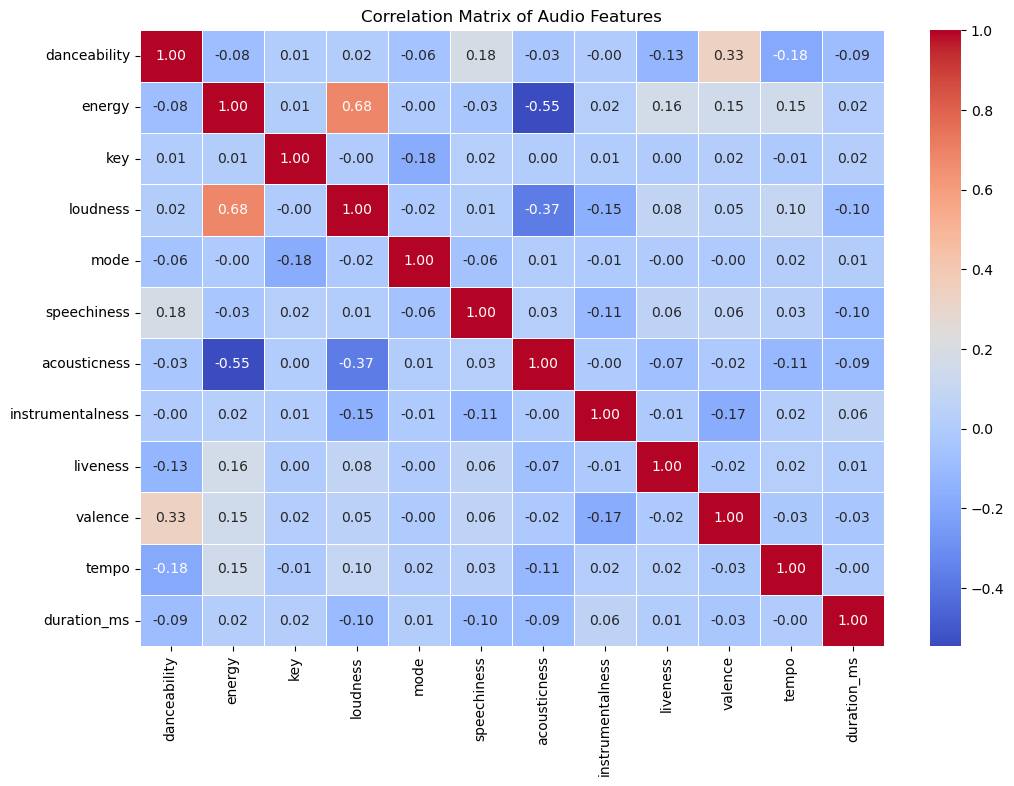

In [1168]:
#Now we analyze the dataset : Visulization and Exploration 
numeric_cols = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
# correlation matrix and heatmap
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Audio Features")
plt.show()

<table>
<tr><th style="color:green"><b><i>Column Name</i></b></th><th style="color:green"><b><i>Description</i></b></th></tr>
<tr><td><b><i>track_id</i></b></td><td>Unique identifier for each track in the dataset</td></tr>
<tr><td><b><i>track_name</i></b></td><td>Name/title of the track</td></tr>
<tr><td><b><i>track_artist</i></b></td><td>Name of the artist performing the track</td></tr>
<tr><td><b><i>track_popularity</i></b></td><td>Popularity of the track (scale 0-100)</td></tr>
<tr><td><b><i>genre</i></b></td><td>Primary genre of the track</td></tr>
<tr><td><b><i>danceability</i></b></td><td>Measures how suitable a track is for dancing (higher = more danceable)</td></tr>
<tr><td><b><i>energy</i></b></td><td>Represents intensity and activity of the track; higher energy tracks feel more energetic and lively</td></tr>
<tr><td><b><i>key</i></b></td><td>Musical key of the track, represented as integers (0=C, 1=C#/Db, … 11=B)</td></tr>
<tr><td><b><i>loudness</i></b></td><td>Overall loudness in decibels (dB) of the track</td></tr>
<tr><td><b><i>mode</i></b></td><td>Modality of the track (1=major, 0=minor)</td></tr>
<tr><td><b><i>speechiness</i></b></td><td>Detects presence of spoken words (higher = more speech-like content)</td></tr>
<tr><td><b><i>acousticness</i></b></td><td>Likelihood that the track is acoustic (higher = more acoustic)</td></tr>
<tr><td><b><i>instrumentalness</i></b></td><td>Predicts whether a track contains no vocals (higher = more instrumental)</td></tr>
<tr><td><b><i>liveness</i></b></td><td>Detects presence of audience (higher = more likely live performance)</td></tr>
<tr><td><b><i>valence</i></b></td><td>Musical positiveness conveyed by a track (higher = more positive, happy, cheerful)</td></tr>
<tr><td><b><i>tempo</i></b></td><td>Speed of the track in beats per minute (BPM)</td></tr>
<tr><td><b><i>duration_ms</i></b></td><td>Duration of the track in milliseconds</td></tr>
</table>


In [1169]:
df['track_artist'].value_counts()

track_artist
Queen             130
Martin Garrix      87
Don Omar           84
David Guetta       81
Hardwell           68
                 ... 
The Veer Union      1
Ice Mc              1
Sonic Snares        1
Keala Settle        1
BIMONTE             1
Name: count, Length: 10692, dtype: int64

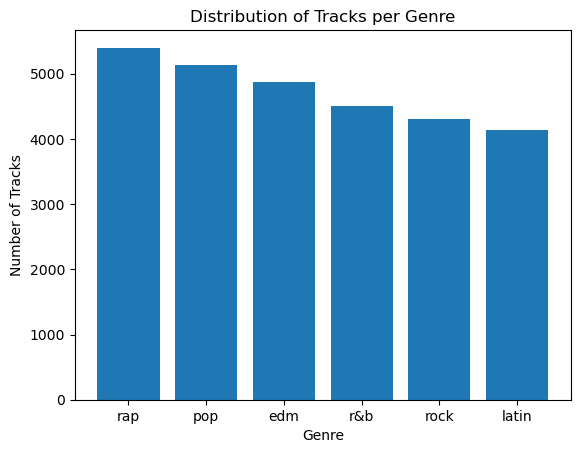

In [1170]:
# bar chart to understand the distirbution of the genre 
genre_counts = df['genre'].value_counts()

# Plot
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Tracks per Genre')
plt.show()

In [1171]:
df.drop(columns='track_id', inplace=True)

## Why `track_id` Is Irrelevant for Music Genre Classification

The `track_id` feature is not useful for music genre classification for the following reasons:

- **Randomly generated**: The values are assigned arbitrarily and do not follow any meaningful pattern.
- **No semantic meaning**: The identifier does not encode any information about the music itself.
- **Unique per track**: Each track has a distinct ID, preventing the model from learning generalizable patterns.
- **No relationship to musical characteristics**: The ID does not correlate with audio features such as tempo, rhythm, or timbre.

Including `track_id` as a feature introduces **noise** into the machine learning model, which can hinder learning and negatively impact overall model performance. A similar characteristics can be referenced and related to the **track_name** column data. 

In [1172]:
df.drop(columns='track_name', inplace=True)
df.columns

Index(['track_artist', 'track_popularity', 'genre', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

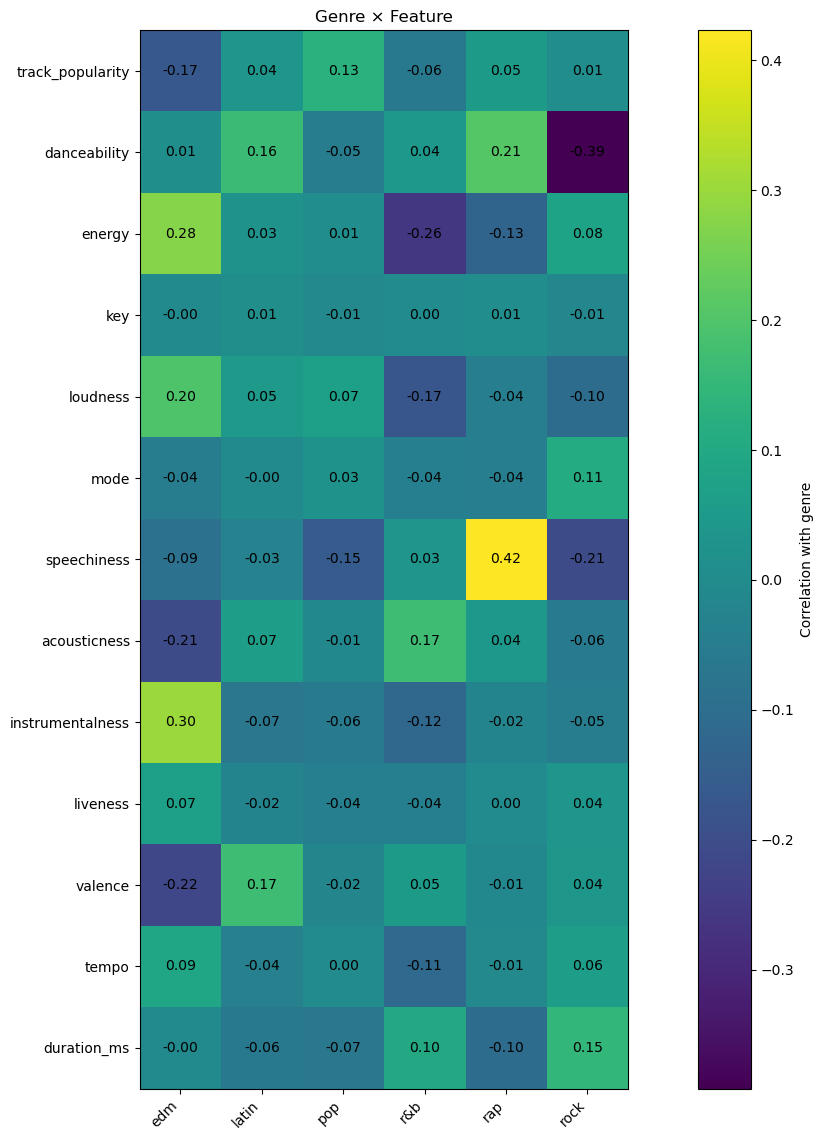

In [1173]:
#Given that we now contain an dataset directly affect the feature of classifying a genre. 
#So, the question that we need to solve, what features accumulate to label a genre its class.  
features = [
    "track_popularity","danceability","energy","key","loudness","mode",
    "speechiness","acousticness","instrumentalness","liveness",
    "valence","tempo","duration_ms"
]

genres = sorted(df["genre"].unique())

# correlation table
corr_table = pd.DataFrame(index=features, columns=genres, dtype=float)
for g in genres:
    binary = (df["genre"] == g).astype(int)  # we are utilizing a trick called one-vs-rest encoding. 
    for feat in features:
        corr_table.loc[feat, g] = df[feat].corr(binary)  
        # This method helps us throughly classify the feature that belongs to each genre using a binary inidicator.


# heatmap with numbers
vals = corr_table.values
plt.figure(figsize=(1.2*len(genres) + 7, 0.5*len(features) + 5))
im = plt.imshow(vals)
plt.colorbar(im, label="Correlation with genre")
plt.xticks(range(len(genres)), genres, rotation=45, ha="right")
plt.yticks(range(len(corr_table.index)), corr_table.index)
plt.title("Genre × Feature")

# Annotate each cell with the numeric value
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        plt.text(j, i, f"{vals[i, j]:.2f}", ha="center", va="center")

plt.tight_layout()
plt.show()

### Musical Key (Genre vs Qualitative data relationshi)
Although several features showed weak linear correlation with genre labels, they were retained due to the limitations of correlation analysis in capturing nonlinear and interaction-based effects which could be relevant to machine learning classifiers.

In [1174]:
# count unique genres per artist
df2 = df[["track_artist", "genre"]].copy()

genres_per_artist = ( df2.groupby("track_artist")["genre"].nunique())    #to counting the unique genres per artist
# distribution of the genre counts
distribution = (genres_per_artist.value_counts().sort_index())
# print result
for k, v in distribution.items():
    label = "genre" if k == 1 else "genres"
    print(f"{k} {label} : {v}")

1 genre : 9276
2 genres : 1090
3 genres : 234
4 genres : 80
5 genres : 12


In [1175]:
genres_per_artist.max()

5

In [1176]:
genres_per_artist.head(n=5)

track_artist
!!!                                             1
!deladap                                        2
"Dear Evan Hansen" August 2018 Broadway Cast    1
#TocoParaVos                                    1
$ANFI                                           1
Name: genre, dtype: int64

That proves no artist has 6 genres.

In [1177]:
df_mode = df[["mode", "genre"]].copy()

mode_summary = (
    df_mode.groupby("mode").agg(tracks=("genre", "size"),unique_genres=("genre", "nunique")).sort_index())

print(mode_summary)

      tracks  unique_genres
mode                       
0      12318              6
1      16034              6


In [1178]:
mode_by_genre = (
    df[["genre","mode"]].groupby("genre")["mode"].mean().sort_values(ascending=False))

print(mode_by_genre)

genre
rock     0.692683
pop      0.591972
latin    0.561654
rap      0.522786
r&b      0.521536
edm      0.516711
Name: mode, dtype: float64


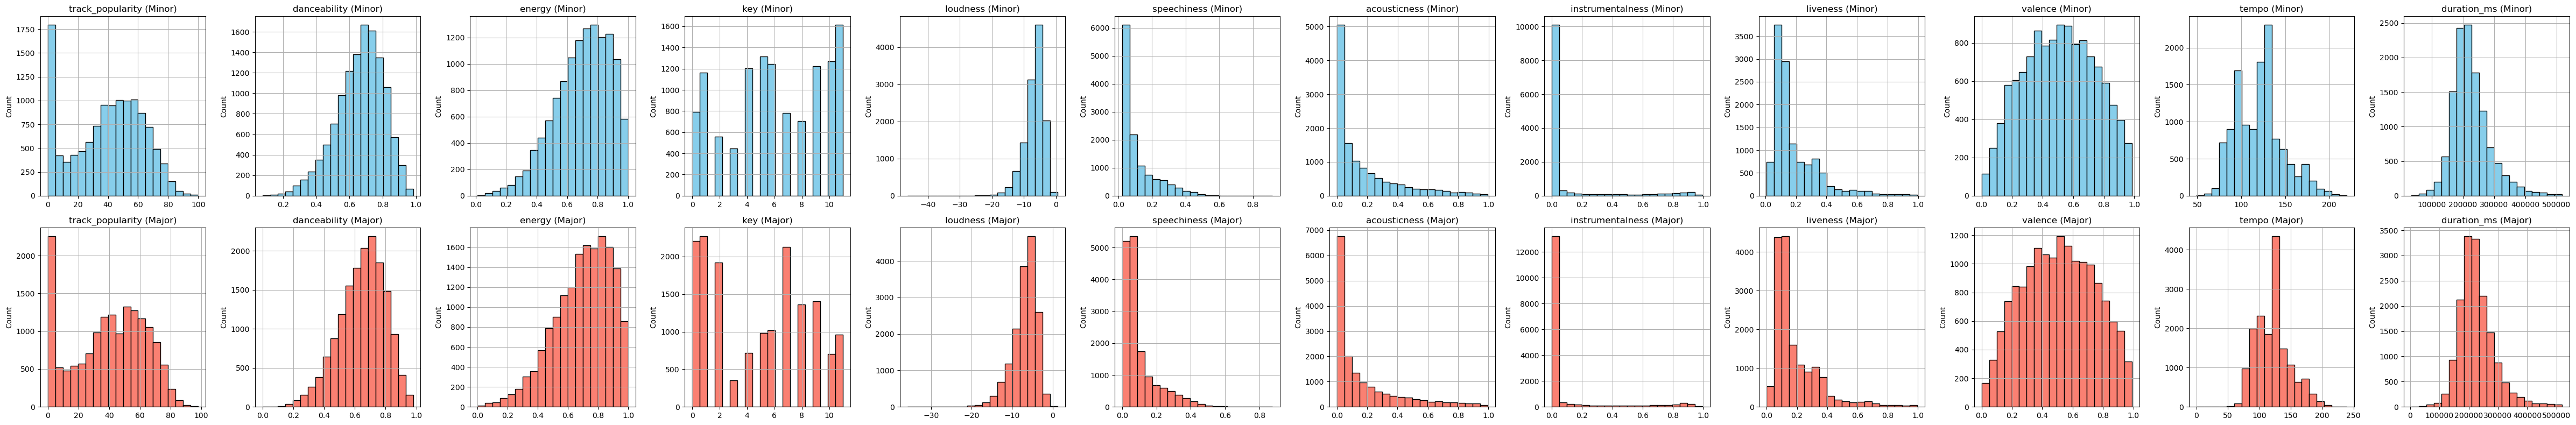

In [1179]:
cols_to_plot = [
    'track_popularity', 'danceability', 'energy', 'key', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]
fig, axes = plt.subplots(nrows=2, ncols=len(cols_to_plot), figsize=(4*len(cols_to_plot), 8), sharey=False)

# Minor mode (0)
df_minor = df[df['mode'] == 0]
for i, col in enumerate(cols_to_plot):
    ax = axes[0, i]
    df_minor[col].hist(bins=20, ax=ax, edgecolor='black', color='skyblue')
    ax.set_title(f"{col} (Minor)")
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Major mode (1)
df_major = df[df['mode'] == 1]
for i, col in enumerate(cols_to_plot):
    ax = axes[1, i]
    df_major[col].hist(bins=20, ax=ax, edgecolor='black', color='salmon')
    ax.set_title(f"{col} (Major)")
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [1180]:
df_key = df[["key", "genre"]].copy()

key_summary = (
    df_key.groupby("key").agg(tracks=("genre", "size"),unique_genres=("genre", "nunique")).sort_index())

print(key_summary)

     tracks  unique_genres
key                       
0      3001              6
1      3436              6
2      2478              6
3       797              6
4      1925              6
5      2301              6
6      2261              6
7      2907              6
8      2066              6
9      2631              6
10     1972              6
11     2577              6


In [1181]:
key_genre_counts = df.groupby(["key", "genre"]).size()
print(key_genre_counts)

key  genre
0    edm      479
     latin    460
     pop      629
     r&b      434
     rap      474
             ... 
11   latin    376
     pop      466
     r&b      403
     rap      523
     rock     322
Length: 72, dtype: int64


It was observed that  `mode`and `key`, shows a significant distinction across each genres. Most features are shared relatively equally and fall within similar ranges, making it difficult to identify genre-specific patterns. Therefore, these features are better utilized directly in model training rather than being preprocessed. The model would be able to assist in the algorithm the model constructs. 

In [1182]:
bins = [0, 20, 40, 60, 80, 101] # This is binned with a 101 due to edge binning issue and hence resolved as such.
labels = ["very_low", "low", "medium", "high", "very_high"]

df["popularity_bin"] = pd.cut(df["track_popularity"], bins=bins, labels=labels, right=False)
genre_popularity_counts = (df[["genre", "popularity_bin"]].groupby(["genre", "popularity_bin"]).size().unstack(fill_value=0))

#The ratio values across bins sum to 1 
genre_popularity_ratio = (genre_popularity_counts.div(genre_popularity_counts.sum(axis=1), axis=0))

print(genre_popularity_counts)
print(genre_popularity_ratio)
df[df["popularity_bin"].isna()]


popularity_bin  very_low   low  medium  high  very_high
genre                                                  
edm                 1510  1594    1420   347          6
latin                885   756    1480   948         67
pop                  956   925    1441  1538        272
r&b                 1283  1086    1277   816         42
rap                 1067  1004    2060  1172         95
rock                1097   797    1297  1088         26
popularity_bin  very_low       low    medium      high  very_high
genre                                                            
edm             0.309617  0.326840  0.291163  0.071150   0.001230
latin           0.213975  0.182785  0.357834  0.229207   0.016199
pop             0.186282  0.180242  0.280787  0.299688   0.053001
r&b             0.284858  0.241119  0.283526  0.181172   0.009325
rap             0.197666  0.185995  0.381623  0.217117   0.017599
rock            0.254820  0.185134  0.301278  0.252729   0.006039


C:\Users\zuhai\AppData\Local\Temp\ipykernel_5896\3018576131.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_popularity_counts = (df[["genre", "popularity_bin"]].groupby(["genre", "popularity_bin"]).size().unstack(fill_value=0))


,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_bin


In [1183]:
ratio_map = (df[["genre", "popularity_bin"]].groupby(["genre", "popularity_bin"]).size().div(df[["genre", "popularity_bin"]].dropna().groupby("genre").size(), level=0))

df["genre_popularity_ratio"] = df.set_index(["genre", "popularity_bin"]).index.map(ratio_map)

C:\Users\zuhai\AppData\Local\Temp\ipykernel_5896\3579765537.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_map = (df[["genre", "popularity_bin"]].groupby(["genre", "popularity_bin"]).size().div(df[["genre", "popularity_bin"]].dropna().groupby("genre").size(), level=0))


In [1184]:
print(df.head(n=5))

    track_artist  track_popularity genre  danceability  energy  key  loudness  \
0         FISHER                79   edm         0.760   0.964    2    -5.844   
1           KISS                 3  rock         0.581   0.831    1    -8.045   
2  Robin Lukovic                 0   edm         0.661   0.760    8    -4.769   
3         Future                62   rap         0.718   0.679   11    -5.899   
4  Black Sabbath                15  rock         0.426   0.619    4   -11.501   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0576      0.001820           0.70000    0.0974    0.641   
1     1       0.1070      0.045800           0.00000    0.0782    0.885   
2     1       0.0268      0.000406           0.04070    0.6110    0.439   
3     0       0.0706      0.001910           0.01040    0.3850    0.205   
4     0       0.0722      0.000084           0.00239    0.1700    0.382   

     tempo  duration_ms popularity_bin  genre_popularity_ratio

In [1185]:
genre_key_counts = df.groupby(["genre", "key"]).size().unstack(fill_value=0)

# Column-wise normalization (vertical)
genre_key_ratio = genre_key_counts.div(genre_key_counts.sum(axis=0), axis=1)

print(genre_key_counts)
print(genre_key_ratio)


key     0    1    2    3    4    5    6    7    8    9    10   11
genre                                                            
edm    479  600  419  155  307  470  421  517  366  356  300  487
latin  460  486  293  114  254  320  373  459  299  410  292  376
pop    629  580  400  161  360  442  399  484  377  495  339  466
r&b    434  603  374  135  255  429  375  425  331  391  349  403
rap    474  879  423  122  333  346  446  499  439  411  503  523
rock   525  288  569  110  416  294  247  523  254  568  189  322
key          0         1         2         3         4         5         6   \
genre                                                                         
edm    0.159613  0.174622  0.169088  0.194479  0.159481  0.204259  0.186201   
latin  0.153282  0.141444  0.118241  0.143036  0.131948  0.139070  0.164971   
pop    0.209597  0.168801  0.161421  0.202008  0.187013  0.192090  0.176471   
r&b    0.144618  0.175495  0.150928  0.169385  0.132468  0.186441  0.165856  

In [1186]:
genre_key_long = genre_key_ratio.reset_index().melt(id_vars="genre", var_name="key", value_name="key_ratio")
df = df.merge(genre_key_long, on=["genre", "key"], how="left")

print(df[["genre", "key", "key_ratio"]].head())

  genre key  key_ratio
0   edm   2   0.169088
1  rock   1   0.083818
2   edm   8   0.177154
3   rap  11   0.202949
4  rock   4   0.216104


In [1187]:
df.isna().sum()

track_artist              0
track_popularity          0
genre                     0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
duration_ms               0
popularity_bin            0
genre_popularity_ratio    0
key_ratio                 0
dtype: int64

The table is a correctly computed ratio showing the fraction of tracks per popularity bin within each genre.

Binning track popularity reveals clear genre-dependent concentration patterns, demonstrating that popularity is not uniformly distributed across genres. Representing popularity as an ordinal categorical feature therefore improves interpretability and provides a more stable and informative signal for both linear models and decision trees.

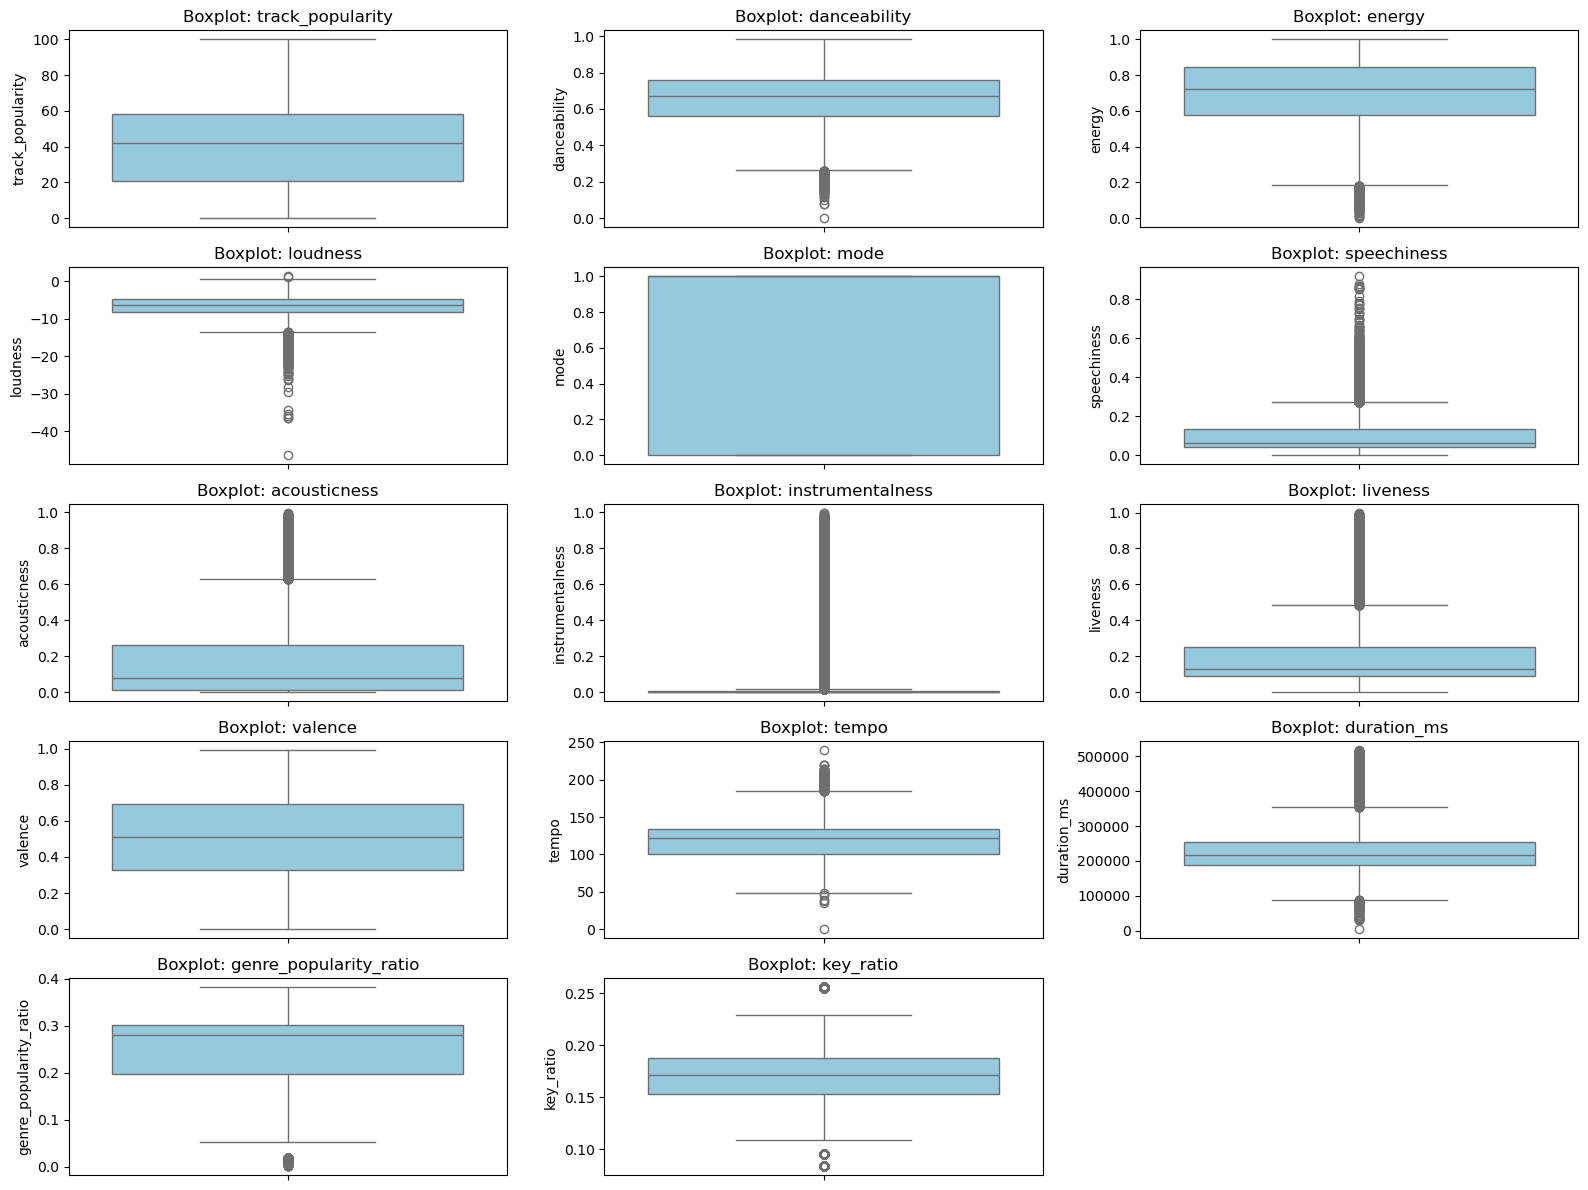

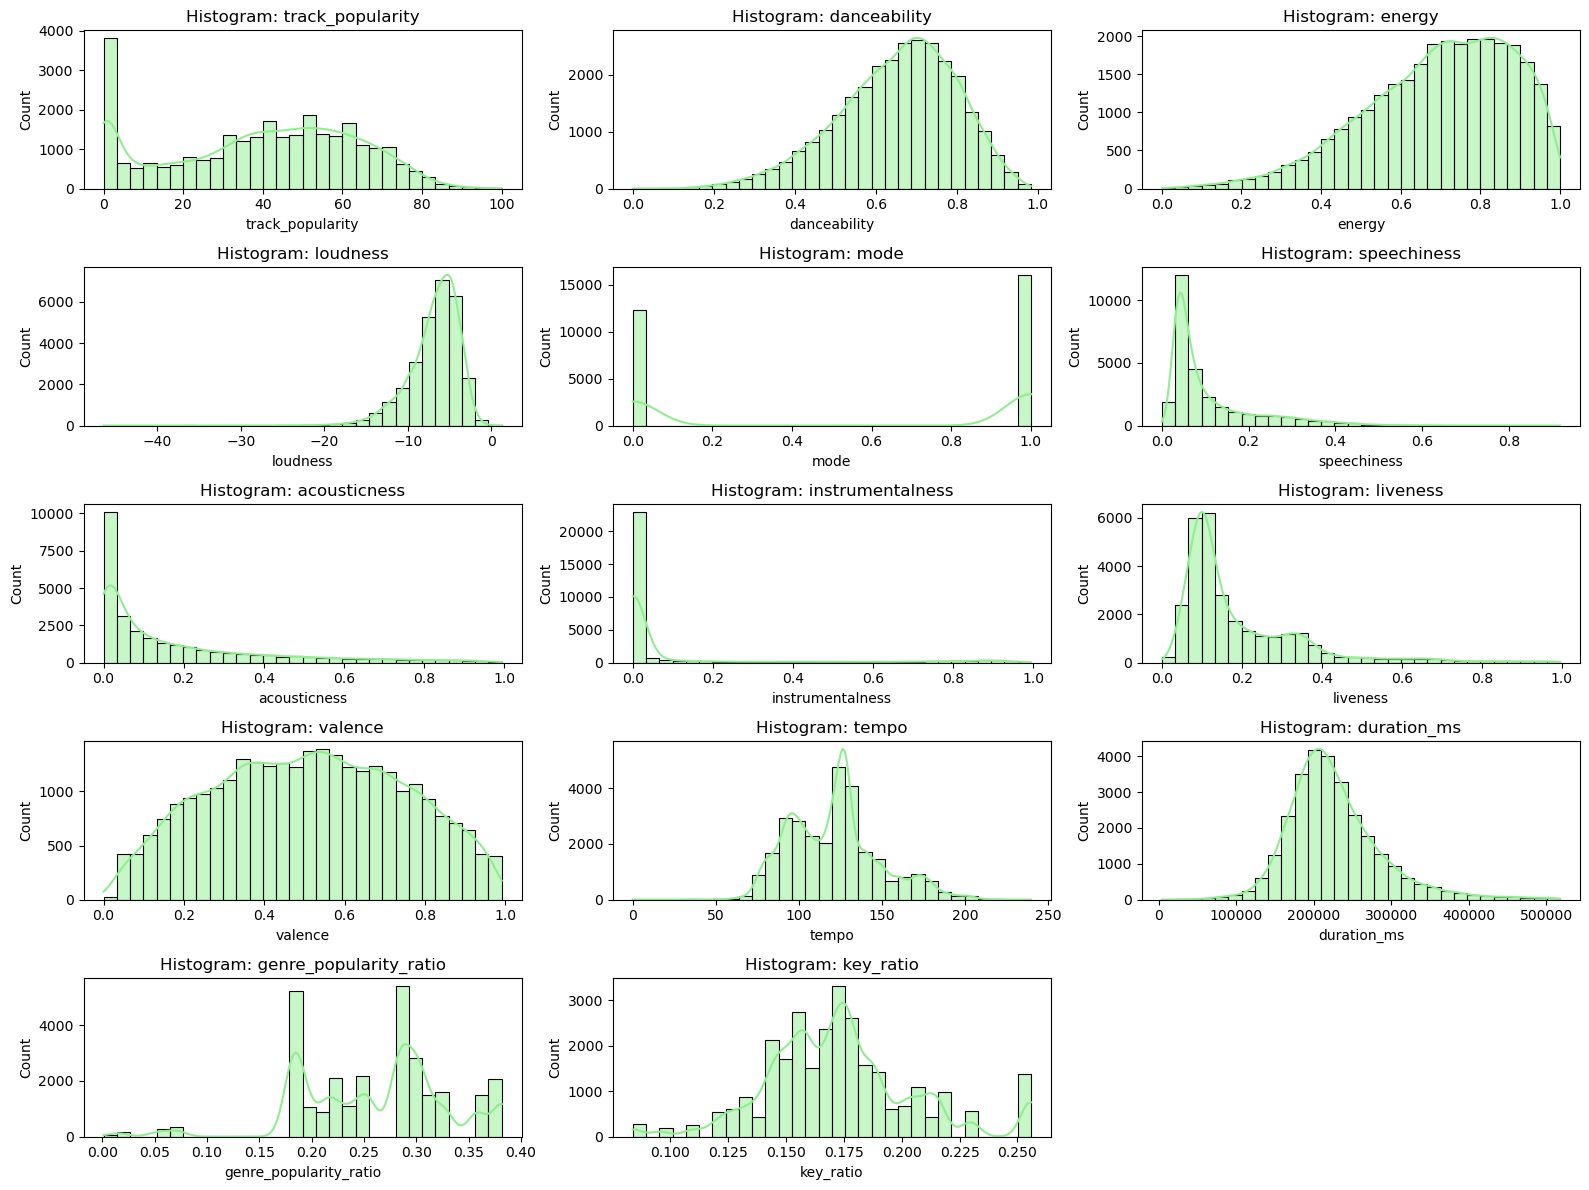

In [1188]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Boxplots
plt.figure(figsize=(16, 12))
plot_index = 1  # grid index 
for col in numeric_cols:
    plt.subplot((len(numeric_cols)+2)//3, 3, plot_index) 
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plot_index += 1  # increment counter
plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(16, 12))
plot_index = 1 
for col in numeric_cols:
    plt.subplot((len(numeric_cols)+2)//3, 3, plot_index)
    sns.histplot(df[col], bins=30, kde=True, color='lightgreen')
    plt.title(f'Histogram: {col}')
    plot_index += 1
plt.tight_layout()
plt.show()

## Valence
The continuous representation of valence retains fine-grained emotional information, allowing the model to capture gradual variations in musical mood. This makes valence a highly informative feature, particularly well-suited for Multiple Linear Regression.

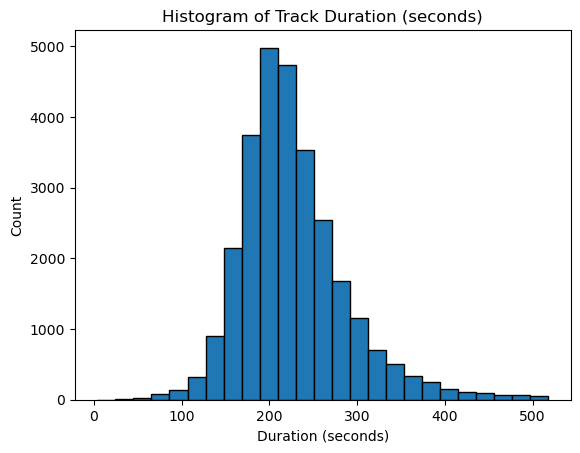

In [1189]:
#Conversion of the time variable to seconds 
df["duration_sec"] = df["duration_ms"] / 1000

# histogram
plt.figure()
plt.hist(df["duration_sec"],bins=25, edgecolor="black")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.title("Histogram of Track Duration (seconds)")
plt.show()

## Loudness
I'm prioritizing statistical coherence and model behavior over raw physical interpretation. 
Decibels(dB) unit representation of loudness is in terms of physics correct, exhibiting a wide negative range that naturally introduces extreme values when assessed.
These deviations are not errors but inherent to the logarithmic nature of the dB scale. However, within the context of this dataset, loudness is not being analyzed as a physical acoustic quantity but as a comparative feature alongside normalized attributes. 

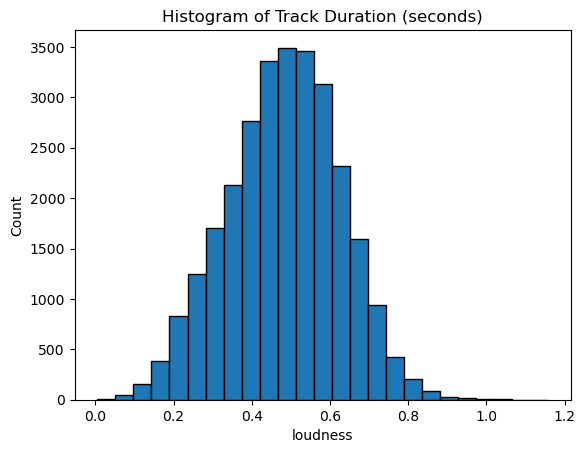

In [1190]:
df['loudness'] = 10 ** (df['loudness'] / 20)
plt.figure()
plt.hist(df["loudness"],bins=25, edgecolor="black")
plt.xlabel("loudness")
plt.ylabel("Count")
plt.title("Histogram of Track Duration (seconds)")
plt.show()

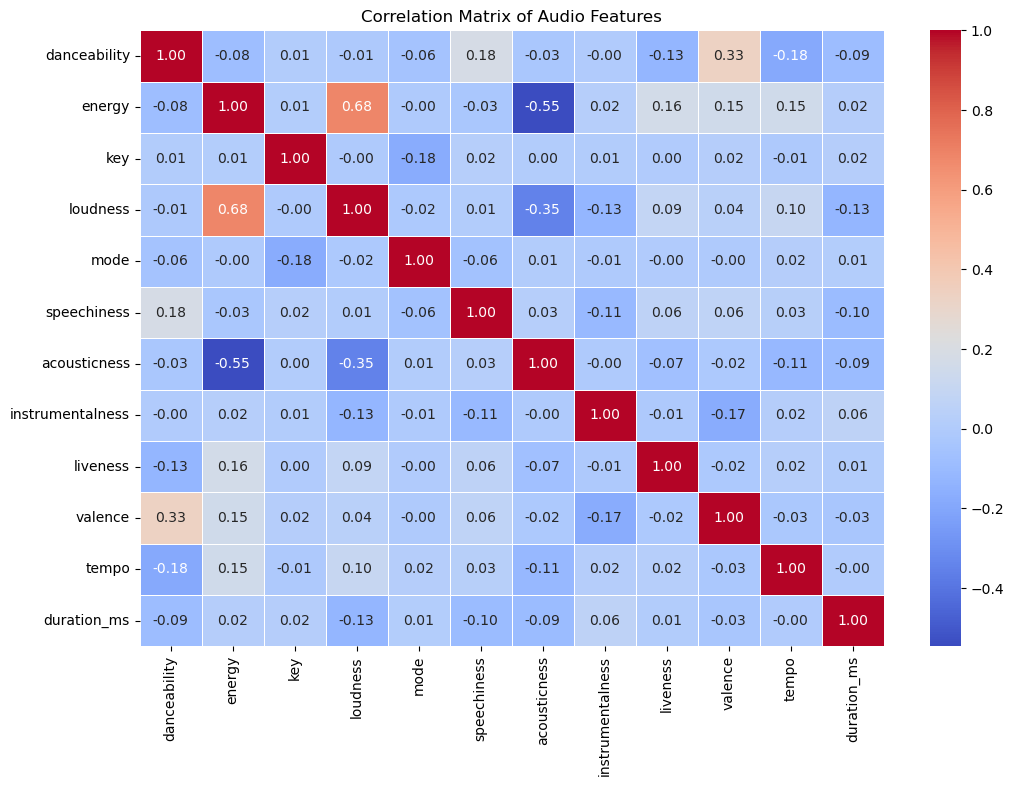

In [1191]:
#Now we analyze the dataset : Visulization and Exploration 
numeric_cols = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
# correlation matrix and heatmap
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Audio Features")
plt.show()

The heatmap is a widely used and visually intuitive tool for exploring correlations between features. However, in the dataset, it shows limitations. While it can highlight obvious correlations, it does not capture more subtle or complex relationships that may only be revealed through deeper analysis or perception. In fact, the heatmap indicates that most correlations appear weak or nonexistent, which hinders further analysis.

## 💡 This is the core genre signal
### Genre Recording / Production Features

These are artist-controlled, mostly stable across audiences.

These define the tone & structure of a genre.

 Strong features

Tempo

Loudness

Energy

Valence

Key / mode

Instrumentalness

Speechiness

Acousticness
energy × tempo        → danceability proxy
valence × energy      → emotional intensity
speechiness × tempo   → rap vs spoken word
energy × duration     → public tangibility

Based on a combination of research, personal intuition, and parameter evaluation, I concluded that the models should be further optimized to classify genres in the same manner as they are classified. The three main steps:

1. **Production** – the generation of features of a song.
2. **Perception** – the interpretation and understanding of these features.
3. **Reaction** – the audience(public) response to the rythm of the song.

In [1192]:
# Production latent variable (P_prod)
prod_features = [
    'duration_sec','tempo', 'energy', 'loudness', 'valence', 'instrumentalness', 'speechiness', 'acousticness','key_ratio','genre_popularity_ratio']
epsilon = 1e-6
## Production features 
X_prod = df[prod_features].copy()
X_prod['voice'] = (
    (df['duration_sec'] * df['valence'] * df['loudness'] * df['tempo'] * df['energy'] * df['key_ratio']))
X_prod['recording'] = (df['liveness']  * df['valence']* df['key_ratio'])

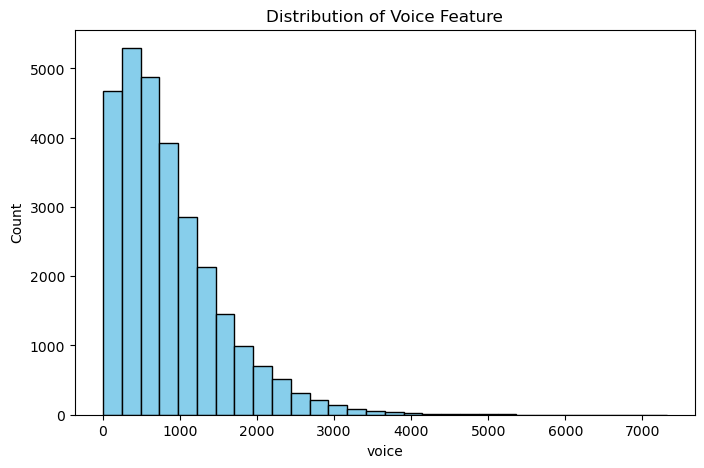

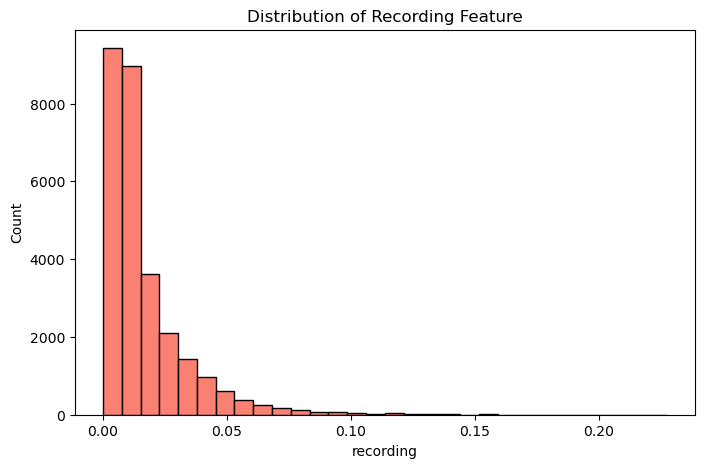

In [1193]:
plt.figure(figsize=(8,5))
plt.hist(X_prod['voice'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Voice Feature')
plt.xlabel('voice')
plt.ylabel('Count')
plt.show()

# Plot histogram for 'recording'
plt.figure(figsize=(8,5))
plt.hist(X_prod['recording'], bins=30, edgecolor='black', color='salmon')
plt.title('Distribution of Recording Feature')
plt.xlabel('recording')
plt.ylabel('Count')
plt.show()

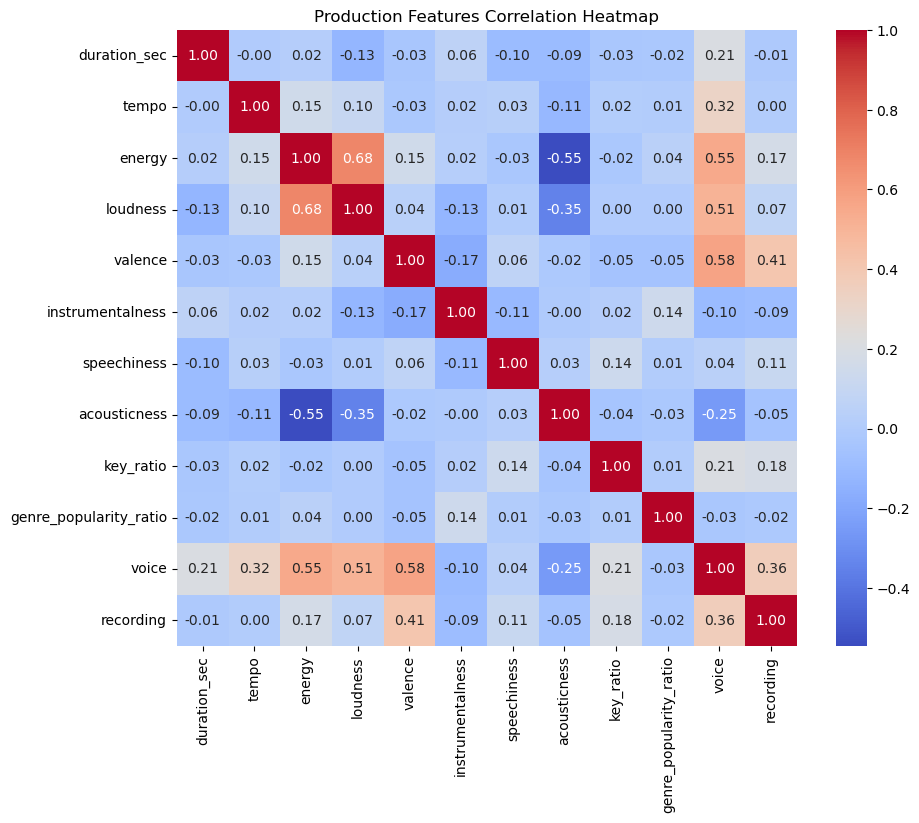

In [1194]:
corr_matrix = X_prod.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Production Features Correlation Heatmap")
plt.show()

In [1195]:
# Perception latent variable (P_perc)
perc_features = [
    'energy', 'valence', 'speechiness', 'instrumentalness', 'liveness', 'duration_sec', 'danceability','genre_popularity_ratio']

## Preception experience features  Conceived perception 
X_perc = df[perc_features].copy()
X_perc['tone'] = (((X_prod['voice'] + X_prod['recording'])* df['genre_popularity_ratio']) / df['duration_sec'])
X_perc['frequency'] = X_prod['voice'] * df['genre_popularity_ratio'] + (df['speechiness'] + df['instrumentalness'])
X_perc['concieved'] = df['danceability'] * df['duration_sec'] * df['valence'] * df['energy'] * df['genre_popularity_ratio']

## Feature Overview

Tone: Ideally multiplicative, but for genre induction we treat voice and recording independently.

Frequency: Additive feature combining tone with speechiness and instrumentalness, representing waveform fluctuations and genre-specific perception.

Conceived Data: Integrates duration, danceability, valence, energy, and tone, reflecting human perception and analytical evaluation within a genre.

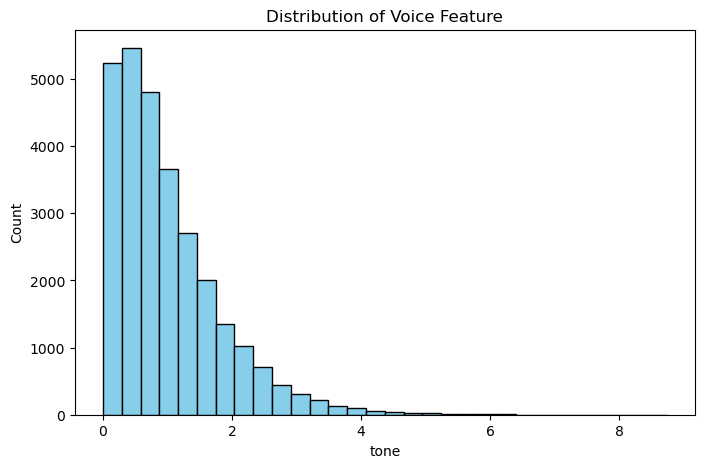

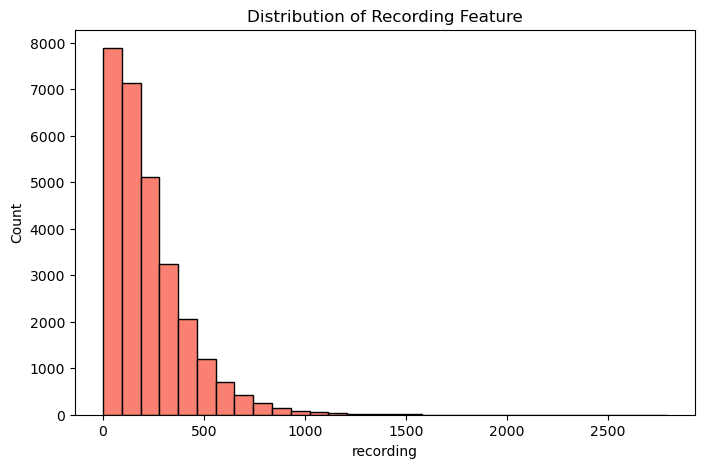

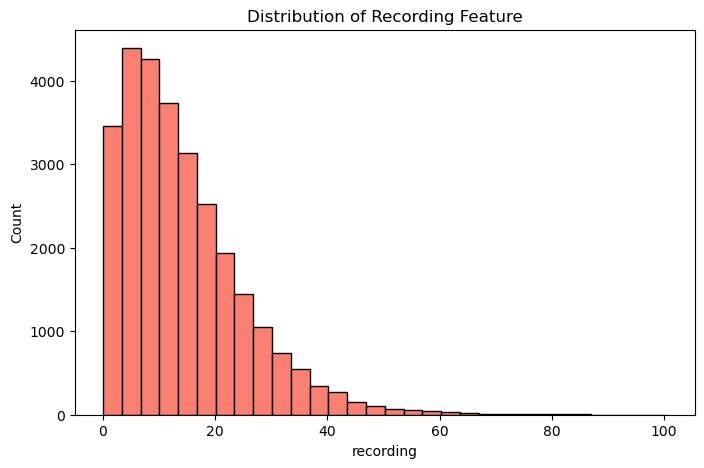

In [1196]:
plt.figure(figsize=(8,5))
plt.hist(X_perc['tone'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Voice Feature')
plt.xlabel('tone')
plt.ylabel('Count')
plt.show()

# Plot histogram for 'recording'
plt.figure(figsize=(8,5))
plt.hist(X_perc['frequency'], bins=30, edgecolor='black', color='salmon')
plt.title('Distribution of Recording Feature')
plt.xlabel('recording')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
plt.hist(X_perc['concieved'], bins=30, edgecolor='black', color='salmon')
plt.title('Distribution of Recording Feature')
plt.xlabel('recording')
plt.ylabel('Count')
plt.show()

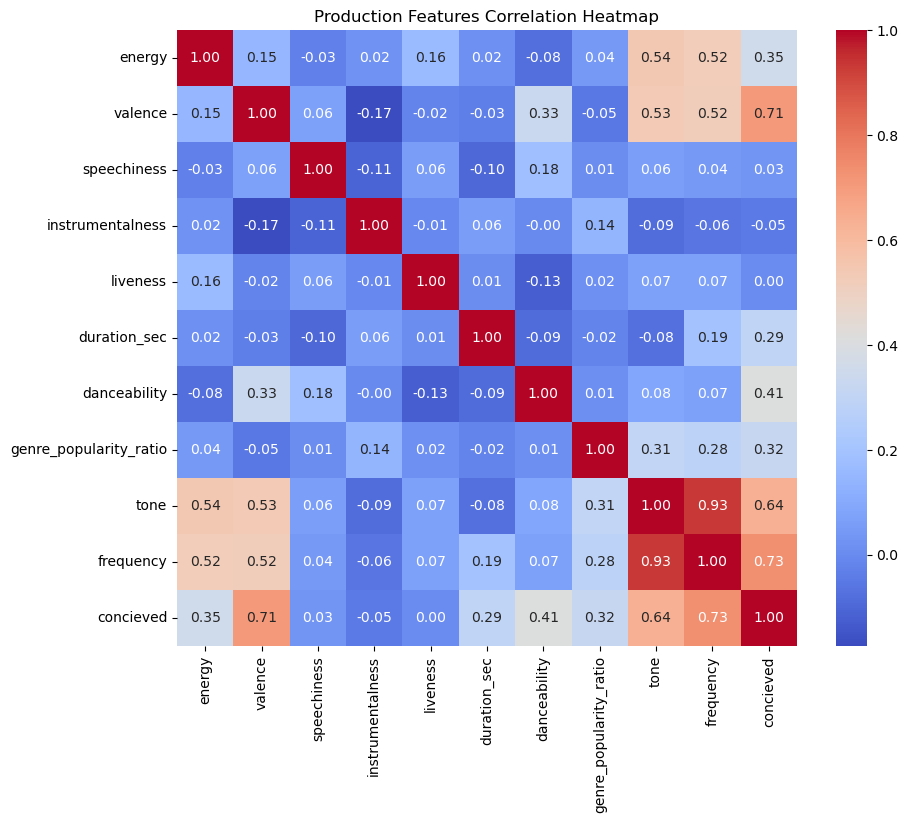

In [1197]:
corr_matrix = X_perc.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Production Features Correlation Heatmap")
plt.show()

In [1198]:
# Reaction latent variable (R_react)
react_features = [
    'tempo', 'duration_sec', 'track_popularity', 'energy', 'danceability']

## Reaction experience features 
X_react = df[react_features].copy()
X_react['reaction'] = df['energy'] * df['track_popularity'] * df['tempo']* df['duration_sec']
X_react['valence_duration'] = (df['valence'] * df['duration_sec'] * df['genre_popularity_ratio'] )/df['tempo']
X_react['valence_duration'] = ((df['valence'] * df['duration_sec']) / df['tempo']).fillna(df['valence'] * df['duration_sec'])

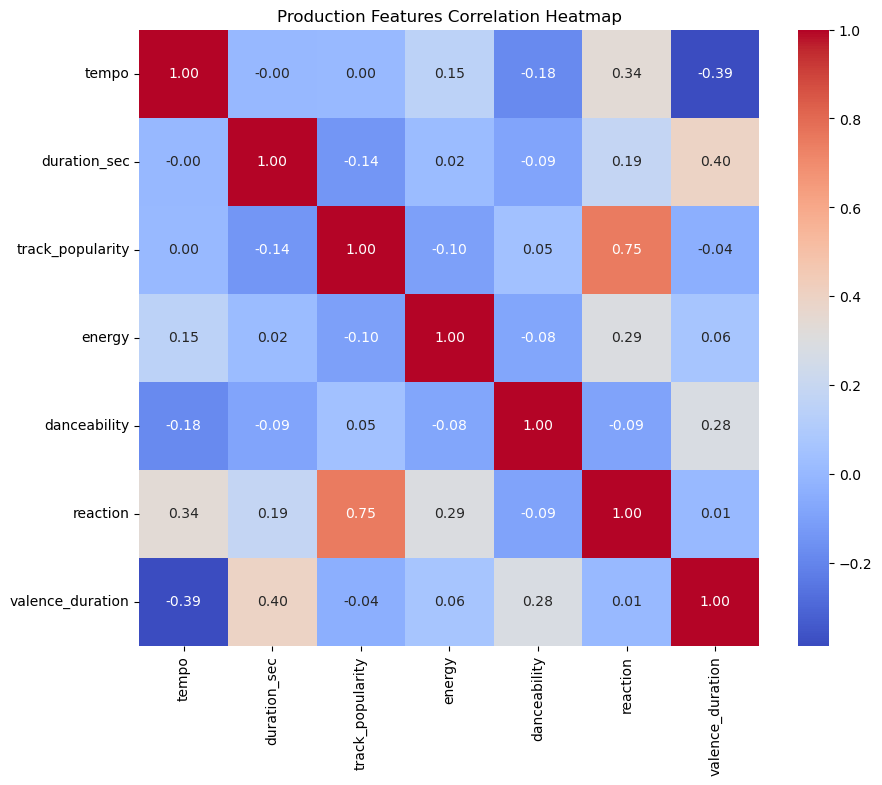

In [1199]:
corr_matrix = X_react.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Production Features Correlation Heatmap")
plt.show()

In [1200]:
# The model data 
new_data = {
    'voice': X_prod['voice'],
    'recording': X_prod['recording'],
    'frequency': X_perc['frequency'],
    'tone': X_perc['tone'],
    'valence_duration': X_react['valence_duration'],
    'concieved': X_perc['concieved'],
    'reaction': X_react['reaction']                    
}
for col_name, series in new_data.items():
    df[col_name] = series

df.drop(columns=['mode'])
df.columns 

Index(['track_artist', 'track_popularity', 'genre', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'popularity_bin', 'genre_popularity_ratio', 'key_ratio', 'duration_sec',
       'voice', 'recording', 'frequency', 'tone', 'valence_duration',
       'concieved', 'reaction'],
      dtype='object')

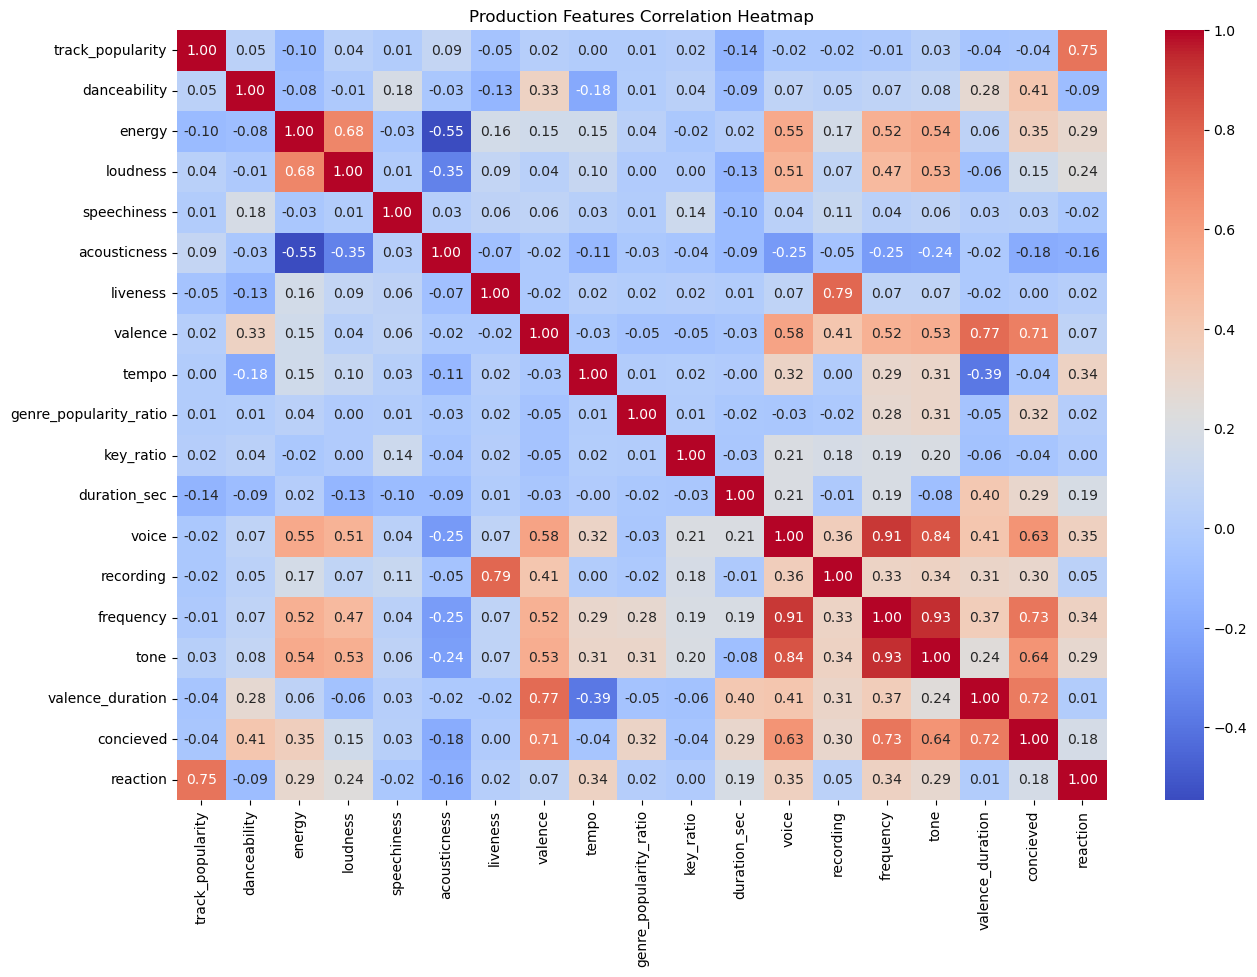

In [1201]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
cols_to_drop = ['mode', 'key', 'genre', 'genre_encoded', 'duration_ms','popularity_bin','instrumentalness']
numeric_df = numeric_df.drop(columns=[col for col in cols_to_drop if col in numeric_df.columns])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Production Features Correlation Heatmap")
plt.show()

track_popularity, liveness, duration_sec,danceability, speechiness, acousticness, both ratios 

In [1202]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_summary = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    iqr_outliers = df[(df[col] < lower) | (df[col] > upper)][col]

    #  Z-score 
    z_scores = np.abs(stats.zscore(df[col]))
    zscore_outliers = df[col][z_scores > 3]

    # Append results to summary
    outlier_summary.append({
        'Column': col,
        'IQR_Outliers': len(iqr_outliers),
        'ZScore_Outliers': len(zscore_outliers)
    })

# Create DataFrame for easy viewing
outlier_table = pd.DataFrame(outlier_summary)
print(outlier_table)

                    Column  IQR_Outliers  ZScore_Outliers
0         track_popularity             0                0
1             danceability           257              106
2                   energy           222              146
3                 loudness           102               43
4                     mode             0                0
5              speechiness          2723              518
6             acousticness          1911              527
7         instrumentalness          6085             1452
8                 liveness          1622              721
9                  valence             0                0
10                   tempo           494              103
11             duration_ms          1197              451
12  genre_popularity_ratio           236              236
13               key_ratio          1859                0
14            duration_sec          1197              451
15                   voice           950              398
16            

## Outlier Analysis and Refactoring Strategy

An outlier assessment was performed across all numerical features using both **IQR-based** and **Z-score–based** methods to evaluate statistical risk and potential error propagation within the dataset.

### Observed Outlier Ratios (Approximate)

- **track_popularity**: 0%  
- **usability**: ~0.9%  
- **key**: 0%  
- **loudness**: ~0.5%  
- **tempo**: ~1.9%  
- **speechiness**: ~9%  
- **acousticness**: elevated  
- **instrumentalness**: elevated  
- **liveness**: elevated  
- **duration_ms**: ~0.9% (primarily Z-score based)

From a statistical and risk-based perspective, features with an outlier ratio exceeding approximately **1%** will be candidates for refactoring.

---

### Refactoring Decisions

**Refactored variables (IQR-based handling):**
- `speechiness`
- `acousticness`
- `instrumentalness`
- `liveness`

These features exhibit skewed, bounded distributions and higher outlier prevalence, making them sensitive to extreme values.

**Retained without refactoring:**
- `duration_ms` : exhibiting minor Z-score outliers (~0.9%), shows a distribution closely aligned with a **normal distribution**.
- `loudness`, `tempo`, `key`, `track_popularity`

Although minor outliers exist in some of these variables, their distributions are stable and do not significantly impact overall dataset robustness.

---

### Outlier Handling Method

For the selected variables, outliers were detected using the **Interquartile Range (IQR)** method.  
Instead of removal, a **mode-based, skew-aware imputation strategy** was applied.

**Rationale:**
- The mode represents the dominant perceptual region of each feature.
- Preserving distributional structure is preferred over aggressive trimming.
- This approach reduces extremity while maintaining semantic meaning.

---


## Encoding Strategy
**Label encoding** is identified as a  more suitable encoding strategy than **one-hot encoding** for this study. **One-hot encoding** significantly increases dimensionality by creating an additional dimension for each genre category. Given the relatively large genre list, this expansion lead to a high-dimensional feature space that complicates model learning and interpretation.

Empirical testing showed that **one-hot encoding** did not perform optimally. The encoding process generated a separate structural representation for each genre, which increased model complexity and made further implementation difficult. This high dimensionality raised concerns about the model being instabile and would increase the risk of overfitting or underfitting, as the model would need to learn from a sparse and fragmented feature space.

**Label encoding**, by contrast, maps each genre to a single numerical value, resulting in a one-dimensional representation of the target variable. This approach reduces computational strain on the model and enables it to process genre information more efficiently. With fewer dimensions to manage, the model can focus on learning meaningful relationships between features and the encoded labels.

This encoding strategy is technically valid. While label encoding does not preserve any inherent ordering between genres, it remains suitable for the selected machine learning models, which can handle categorical labels represented numerically. The Models intended to work wirth are **Multilinear Regression modal** and **Decision Tree**.

Based on these considerations,**label encoding** will be consistently applied across the entire dataset for this study.

Although standard documentation recommends label encoding for target variables, the decision in this study was not based solely on that guidance. The choice was made through **practical experimentation** and **evaluation of model behavior**.

In [1203]:
#Label Encoding : binary encoiding for genre categrocial data  
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])  # genre column
print(df[['genre', 'genre_encoded']])

      genre  genre_encoded
0       edm              0
1      rock              5
2       edm              0
3       rap              4
4      rock              5
...     ...            ...
28347  rock              5
28348   r&b              3
28349   pop              2
28350   edm              0
28351   pop              2

[28352 rows x 2 columns]


In [1204]:
df.columns

Index(['track_artist', 'track_popularity', 'genre', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'popularity_bin', 'genre_popularity_ratio', 'key_ratio', 'duration_sec',
       'voice', 'recording', 'frequency', 'tone', 'valence_duration',
       'concieved', 'reaction', 'genre_encoded'],
      dtype='object')

In [1205]:
df['popularity_bin'] = label_encoder.fit_transform(df['popularity_bin'])  
print(df[['genre', 'popularity_bin']])

      genre  popularity_bin
0       edm               0
1      rock               4
2       edm               4
3       rap               0
4      rock               4
...     ...             ...
28347  rock               1
28348   r&b               4
28349   pop               2
28350   edm               1
28351   pop               0

[28352 rows x 2 columns]


## Construction of the Multiple Linear Regression Model

This section showcases the process of constructing a **Multiple Linear Regression** model. It outlines the selection of input features, the formulation of the model, and the steps involved in training and preparing the model for predicting the target variable.

In [1253]:
features = [
'energy',
'valence',
'danceability',
'tempo',
'duration_sec']
#Dataset
y = df["genre_encoded"] 
X  = df[features].copy()
data = pd.concat([X, y], axis=1)
X = data[features] # Features
y = data["genre_encoded"] # Target 

In [1254]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y )
#What stratify=y does makes sure the train and test sets have the same genre proportions as the original data.
X_train.shape

(22681, 5)

In [1255]:
#Hardcoding and extracting tract_artist with one genre 
one_genre_artists = genres_per_artist[genres_per_artist == 1].index
df_one_genre = df[df["track_artist"].isin(one_genre_artists)].copy()
df_one_genre.info()
df_one_genre.head(n=5)

<class 'pandas.core.frame.DataFrame'>
Index: 17465 entries, 0 to 28350
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_artist            17465 non-null  object 
 1   track_popularity        17465 non-null  int64  
 2   genre                   17465 non-null  object 
 3   danceability            17465 non-null  float64
 4   energy                  17465 non-null  float64
 5   key                     17465 non-null  object 
 6   loudness                17465 non-null  float64
 7   mode                    17465 non-null  int64  
 8   speechiness             17465 non-null  float64
 9   acousticness            17465 non-null  float64
 10  instrumentalness        17465 non-null  float64
 11  liveness                17465 non-null  float64
 12  valence                 17465 non-null  float64
 13  tempo                   17465 non-null  float64
 14  duration_ms             17465 non-null  int

,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,key_ratio,duration_sec,voice,recording,frequency,tone,valence_duration,concieved,reaction,genre_encoded
0,FISHER,79,edm,0.760,0.964,2,0.510270,1,0.0576,0.001820,...,0.169088,248.036,1652.998716,0.010557,118.368950,0.474174,1.271929,8.287816,2.361179e+06,0
2,Robin Lukovic,0,edm,0.661,0.760,8,0.577497,1,0.0268,0.000406,...,0.177154,271.238,925.761280,0.047518,286.698530,1.056805,1.190818,18.520568,0.000000e+00,0
4,Black Sabbath,15,rock,0.426,0.619,4,0.266042,0,0.0722,0.000084,...,0.216104,168.440,372.610806,0.014034,95.023267,0.563716,0.395426,4.323568,2.544900e+05,5
6,Alvaro Soler,0,latin,0.617,0.939,8,0.635112,0,0.1040,0.070600,...,0.144724,212.381,1509.325478,0.034210,323.061766,1.520687,1.137211,17.482246,0.000000e+00,1
7,Lucy Pearl,1,r&b,0.783,0.418,1,0.512802,1,0.0659,0.005640,...,0.175495,221.267,556.708023,0.020936,158.650631,0.716730,1.502851,13.904099,9.178114e+03,3


In [1256]:
mask = X_train.index.isin(df[df["track_artist"].isin(one_genre_artists)].index)
X_train = X_train[mask].copy()
y_train = y_train[mask].copy()

In [1257]:
X_train.shape

(13943, 5)

Linear models benefit from genre purity(one genre) to ensure interpretability and statistical significance. This wont be applied to decision tree due beung capable of being robust under genre overlap due to their inherent non-linear splitting mechansim. This will be a good parameter model indicator, diagnoses the performance on classifiying unseen data between these two models. 

Adding popularity_bin as an ordinal feature and augmenting it with a genre-conditional popularity ratio is methodologically sound and improves representational power, provided that the ratio is computed exclusively from training data to avoid information leakage.

In [1258]:
X_train.head(n=5)

,energy,valence,danceability,tempo,duration_sec
3081,0.525,0.230,0.695,126.087,271.467
21665,0.459,0.761,0.746,75.090,270.467
7138,0.562,0.192,0.679,87.953,198.068
23494,0.715,0.705,0.609,166.048,312.573
21118,0.452,0.423,0.877,120.069,184.034


In [1259]:
#Handling Missing Values

columns_to_check = X_train.columns
outlier_counts = {}

for col in columns_to_check:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_counts[col] = ((X_train[col] < lower) | (X_train[col] > upper)).sum()

outlier_table = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier_Count'])
print(outlier_table)

        Feature  Outlier_Count
0        energy             84
1       valence              0
2  danceability            133
3         tempo            226
4  duration_sec            575


In [1260]:
# #• Implement Imputation:
# columns_to_adjust = [ 'instrumentalness', 'liveness', 'acousticness'] # 'speechiness', --- removed
# #mena imputation 
# for col in columns_to_adjust:
#     # Compute median and mean
#     median_value = X_train[col].median()
#     mean_value = X_train[col].mean()
#     central_value = median_value if median_value != 0 else mean_value
    
#     Q1 = X_train[col].quantile(0.25)
#     Q3 = X_train[col].quantile(0.75)
    
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     X_train.loc[X_train[col] > upper_bound, col] = central_value
#     X_train.loc[X_train[col] < lower_bound, col] = central_value
# # .fit() method 
# # keeping the testing set as unbiased, unseen data

In [1261]:
# columns_to_check = [ 'instrumentalness', 'liveness', 'acousticness'] #'speechiness',
# outlier_counts = {}

# for col in X_train[columns_to_check]:
#     Q1 = X_train[col].quantile(0.25)
#     Q3 = X_train[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR

#     outlier_counts[col] = ((X_train[col] < lower) | (X_train[col] > upper)).sum()

# outlier_table = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier_Count'])
# print(outlier_table)

In [1262]:
# Standardization  :# Normalization 
features_to_normalize = [ 'duration_sec','tempo'] #'duration_sec', removed    
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train[features_to_normalize] = scaler.fit_transform(X_train[features_to_normalize])
X_test[features_to_normalize] = scaler.fit_transform(X_test[features_to_normalize])

We will apply Z-score standardization to the data, which rescales each feature to have a mean of 0 and a standard deviation of 1. This ensures that features with different magnitudes contribute proportionally to the model, improving numerical stability and making the data suitable for algorithms like linear regression.

In [1263]:
X_train.head()

,energy,valence,danceability,tempo,duration_sec
3081,0.525,0.230,0.695,0.573146,0.521487
21665,0.459,0.761,0.746,0.341332,0.519537
7138,0.562,0.192,0.679,0.399803,0.378379
23494,0.715,0.705,0.609,0.754795,0.601632
21118,0.452,0.423,0.877,0.545791,0.351017


In [1264]:
X_train.loc[X_train.isna().any(axis=1)]


,energy,valence,danceability,tempo,duration_sec


In [1265]:
#Multiple Linear Regression
#Making predictions 
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_cont = reg.predict(X_test)  
mse = mean_squared_error(y_test, y_pred_cont)
r2 = r2_score(y_test, y_pred_cont)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 2.5439
R-squared: 0.1121


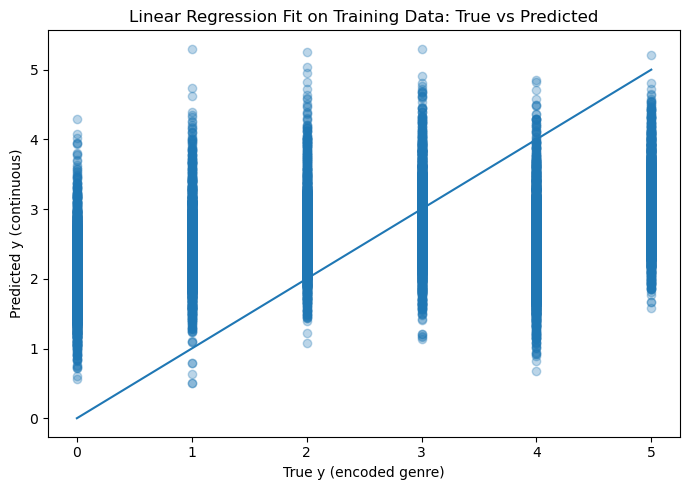

In [1266]:
# Interpret the Model Parameter
# Use simple_reg_model.coef_ to get the slope and 
# simple_reg_model.intercept_ to get the intercept
#Predicted vs True
y_train_pred = reg.predict(X_train)

plt.figure(figsize=(7,5))
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()])  # ideal y=x line (no fixed colors)
plt.xlabel("True y (encoded genre)")
plt.ylabel("Predicted y (continuous)")
plt.title("Linear Regression Fit on Training Data: True vs Predicted")
plt.tight_layout()
plt.show()

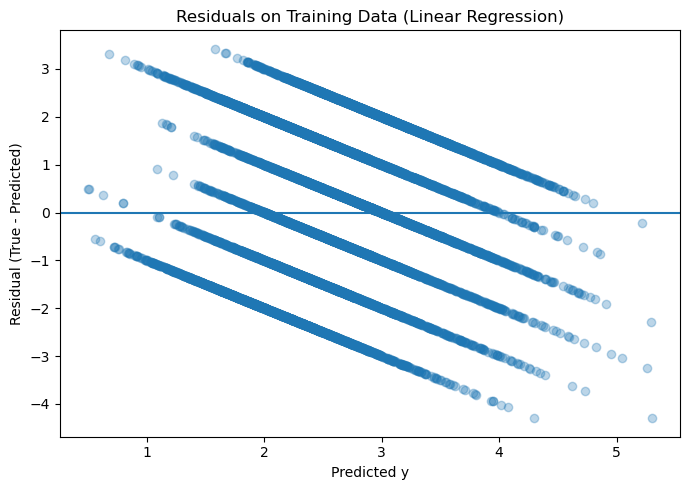

In [1267]:
#Residual plot
residuals = y_train - y_train_pred

plt.figure(figsize=(7,5))
plt.scatter(y_train_pred, residuals, alpha=0.3)
plt.axhline(0)  # zero-error line
plt.xlabel("Predicted y")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals on Training Data (Linear Regression)")
plt.tight_layout()
plt.show()

In [1268]:
#  Model Diagnostics
# • Analyze the intercept and coefficients to understand the model structure.
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': reg.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)


        Feature  Coefficient
2  danceability    -3.650143
0        energy    -2.143758
1       valence     1.509888
3         tempo    -0.613195
4  duration_sec     0.302512


In [1269]:
new_coef = reg.coef_.copy()

# Flip all signs: positive → negative, negative → positive
new_coef = -1 * new_coef

# Assign the flipped coefficients back to the model
reg.coef_ = new_coef

# Run predictions with the flipped coefficients
y_pred_flipped = reg.predict(X_test)

# Evaluate performance
mse_flipped = mean_squared_error(y_test, y_pred_flipped)
r2_flipped = r2_score(y_test, y_pred_flipped)

print(f"Flipped Model Mean Squared Error: {mse_flipped:.4f}")
print(f"Flipped Model R-squared: {r2_flipped:.4f}")

Flipped Model Mean Squared Error: 47.6434
Flipped Model R-squared: -15.6293


## Construction of the Logistic Regression Model

This section showcases the process of constructing a **Multiple Linear Regression** model. It outlines the selection of input features, the formulation of the model, and the steps involved in training and preparing the model for predicting the target variable.

In [1271]:
features = [
'energy',
'valence',
'danceability',
'tempo',
'frequency']
#Dataset
y = df["genre_encoded"] 
X  = df[features].copy()
data = pd.concat([X, y], axis=1)
X = data[features] # Features
y = data["genre_encoded"] 

In [1272]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y )
#What stratify=y does makes sure the train and test sets have the same genre proportions as the original data.
one_genre_artists = genres_per_artist[genres_per_artist == 1].index
df_one_genre = df[df["track_artist"].isin(one_genre_artists)].copy()
mask = X_train.index.isin(df[df["track_artist"].isin(one_genre_artists)].index)
X_train = X_train[mask].copy()
y_train = y_train[mask].copy()

In [1275]:
X_train.shape
X_train.head()

,energy,valence,danceability,tempo,frequency
3081,0.525,0.230,0.695,126.087,67.817349
21665,0.459,0.761,0.746,75.090,57.904147
7138,0.562,0.192,0.679,87.953,20.033146
23494,0.715,0.705,0.609,166.048,392.187051
21118,0.452,0.423,0.877,120.069,137.449303


## Normalization 
Already applied normalization 

In [1276]:
# Standardization  :# Normalization 
features_to_normalize = [ 'frequency','tempo'] #'duration_sec', removed    
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train[features_to_normalize] = scaler.fit_transform(X_train[features_to_normalize])
X_test[features_to_normalize] = scaler.fit_transform(X_test[features_to_normalize])

In [1277]:
log_reg = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42
)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

C:\Users\zuhai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [1278]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
target_names = df['genre_encoded'].astype(str).unique().tolist()
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Test Accuracy: 0.3934050432022571

Confusion Matrix:
 [[525  50  12  37 199 152]
 [114 175  12 232 209  85]
 [172  67  29 243 269 247]
 [ 34  48   4 435 247 133]
 [127  45  15 249 525 119]
 [ 54  24   3 189  49 542]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.54      0.52       975
           5       0.43      0.21      0.28       827
           4       0.39      0.03      0.05      1027
           1       0.31      0.48      0.38       901
           3       0.35      0.49      0.41      1080
           2       0.42      0.63      0.51       861

    accuracy                           0.39      5671
   macro avg       0.40      0.40      0.36      5671
weighted avg       0.40      0.39      0.36      5671



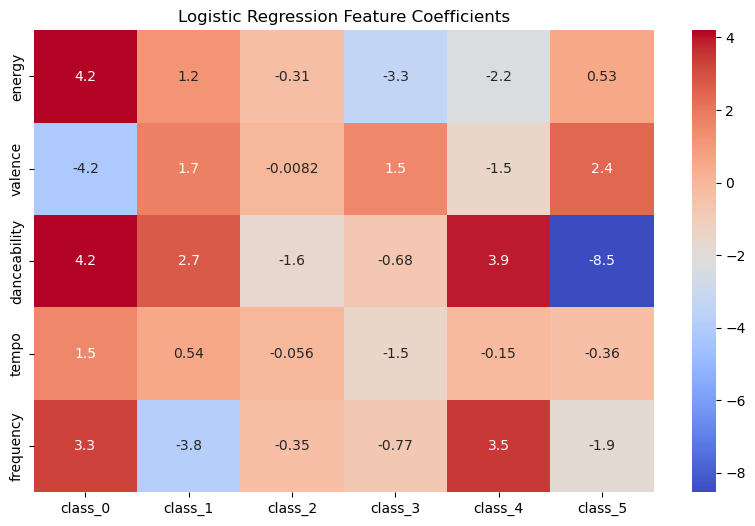

In [1279]:
coef_df = pd.DataFrame(
    log_reg.coef_.T,
    index=X.columns,
    columns=[f'class_{i}' for i in range(log_reg.coef_.shape[0])]
)
plt.figure(figsize=(10,6))
sns.heatmap(coef_df, annot=True, cmap='coolwarm')
plt.title('Logistic Regression Feature Coefficients')
plt.show()

## Construction of the Decision Tree Model

This section describes the development of the **Decision Tree** model for genre classification. It covers the selection of input features, the structure of the decision tree, and the training procedure used to learn decision rules from the data. The model recursively partitions the feature space based on criteria that maximize class separation, enabling the identification of nonlinear relationships between audio features and musical genres.

In [1280]:
features = [
'frequency', 'tone', 'voice', 'energy', 'valence',  'concieved', 'danceability',  'tempo',  'valence_duration', 'reaction']
#Dataset
y = df["genre_encoded"] 
X  = df[features].copy()
data = pd.concat([X, y], axis=1)
X = data[features] # Features
y = data["genre_encoded"] # Target 

In [1281]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [1282]:
#We will use multiple linear regression and Decision trees 
#For Decision Trees regression apply evaulation using : COnfusin metrix, Classofication report and analysis of the metric 
dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=2, criterion='entropy' )
dt.fit(X_train, y_train)

cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
print("5-fold CV Accuracy:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

5-fold CV Accuracy: [0.42595913 0.42918609 0.42990319 0.4010043  0.43974175]
Mean CV Accuracy: 0.4251588917930814


In [1283]:
y_pred_dt = dt.predict(X_test)

In [1284]:
# Accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Test Accuracy:", acc_dt)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", cm_dt)

# Classification Report
target_names = df['genre_encoded'].astype(str).unique().tolist()
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names))

Decision Tree Test Accuracy: 0.2629165931934403

Confusion Matrix:
 [[ 76 125  61  91 459 163]
 [ 18 112  54 176 389  78]
 [ 40  87  85 226 362 227]
 [ 32  58  52 337 297 125]
 [ 80  95  87 227 459 132]
 [ 26  38  68 196 111 422]]

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.08      0.12       975
           5       0.22      0.14      0.17       827
           4       0.21      0.08      0.12      1027
           1       0.27      0.37      0.31       901
           3       0.22      0.42      0.29      1080
           2       0.37      0.49      0.42       861

    accuracy                           0.26      5671
   macro avg       0.26      0.26      0.24      5671
weighted avg       0.26      0.26      0.24      5671



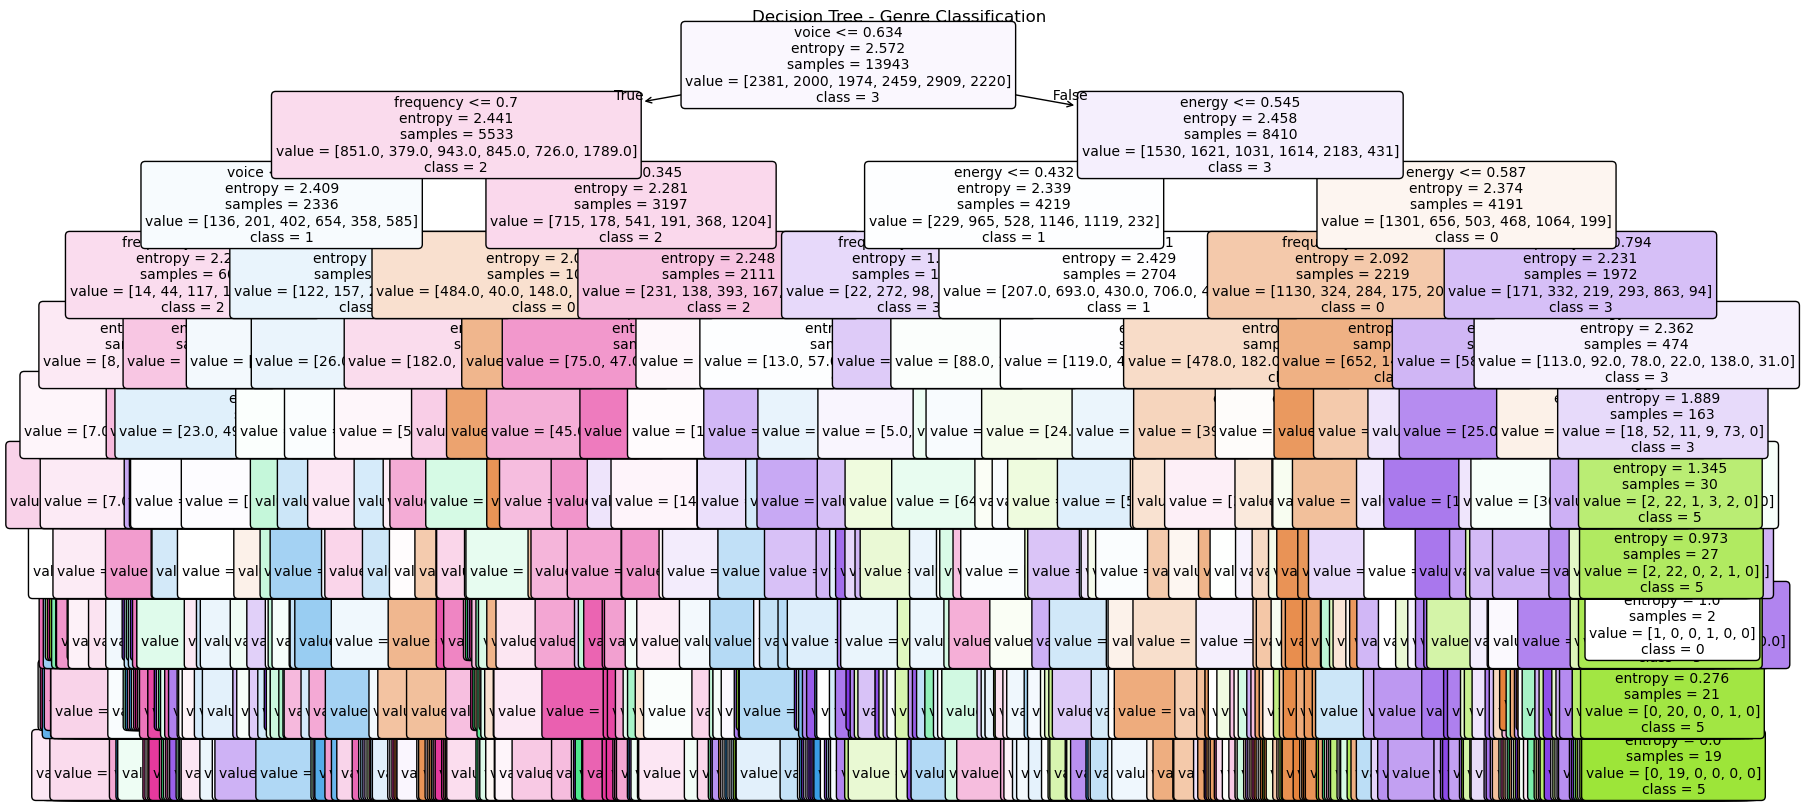

In [1285]:
plt.figure(figsize=(20,10))
plot_tree(dt,feature_names=X.columns, class_names=[str(c) for c in target_names], filled=True, rounded=True,fontsize=10)
plt.title('Decision Tree - Genre Classification')
plt.show()

# Crazy 

In [ ]:
GB = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=5,random_state=42)
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

In [ ]:
acc_gb = accuracy_score(y_test, y_pred)
print("Gradient Boosting Test Accuracy:", acc_gb)

cm_gb = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm_gb)

target_names = df['genre_encoded'].astype(str).unique().tolist()
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
